# **Workshop #1 - Notebook 2: Exploratory analysis of the dataset (EDA)**
This notebook is focused on performing exploratory data analysis (EDA) on the candidates dataset. EDA is a crucial step in the data analysis process as it helps us understand the structure and characteristics of the data. By analyzing the dataset, we can uncover patterns, relationships, and potential insights that can guide further analysis and decision-making.

In this notebook, we will explore the dataset using various statistical and visual techniques. We will examine the distribution of variables and investigate relationships between different variables. Through this analysis, we aim to gain a comprehensive under of the dataset and generate meaningful insights.

---

## ***Setting the environment***

In [78]:
import os 
print(os.getcwd())

try:
    os.chdir("../../Workshop #1")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estés en la ruta especificada.
        Si ya te funcionó, no ejecutes este bloque de nuevo, ya que el directorio actual es Workshop #1.
        
        Confirma que la ruta en donde te ubicas es la correcta con la siguiente dirección:
        """)

print(os.getcwd())

c:\Users\mitgar14\OneDrive\Escritorio - PC\Ingenieria de Datos e IA - UAO\Semestre 4\ETL\Semana #1 - #6\Workshop #1

        FileNotFoundError - Puede que el directorio no exista o no estés en la ruta especificada.
        Si ya te funcionó, no ejecutes este bloque de nuevo, ya que el directorio actual es Workshop #1.
        
        Confirma que la ruta en donde te ubicas es la correcta con la siguiente dirección:
        
c:\Users\mitgar14\OneDrive\Escritorio - PC\Ingenieria de Datos e IA - UAO\Semestre 4\ETL\Semana #1 - #6\Workshop #1


## ***Reading the data***

### **Importing the dependencies**

We will be using Pandas to perform the analysis of the data from the dataframe structure, and Matplotlib and Seaborn for the realization of certain graphs that will help to better explain the insights obtained from the data. 

In [79]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from functions.db_connection.connection import creating_engine

### **Creating the engine**

The connection was relegated to a Python script called *connection.py*: from this script we mainly use the creating_engine function, which is in charge of establishing the connection via SQLAlchemy to a PostgreSQL database.

In [80]:
engine = creating_engine()

### **Loading the dataset**

We read the dataset from a table that stores our data: this table is located in a PostgreSQL database that is linked to the engine created with SQLAlchemy.

In [81]:
df = pd.read_sql_table("candidates_raw", engine, parse_dates=["Application Date"])
df

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7
...,...,...,...,...,...,...,...,...,...,...
49995,Bethany,Shields,rocky_mitchell@hotmail.com,2022-01-09,Dominican Republic,27,Trainee,Security,2,1
49996,Era,Swaniawski,dolores.roob@hotmail.com,2020-06-02,Morocco,21,Lead,Game Development,1,2
49997,Martin,Lakin,savanah.stracke@gmail.com,2018-12-15,Uganda,20,Trainee,System Administration,6,1
49998,Aliya,Abernathy,vivienne.fritsch@yahoo.com,2020-05-30,Czech Republic,20,Senior,Database Administration,0,0


## ***Data preparation***

Columns are renamed with a ***Snake case*** format in order to facilitate queries using `df.query()`.

In [82]:
renamed_columns = {
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

df = df.rename(columns=renamed_columns)

## ***Data understanding***

### **Data columns' info**

The previous report gives us multiple conclusions:

* The Dtypes of the different columns are appropriate to perform an analysis of the dataset without many complications: **no deep transformation is required** in this aspect.

* There are 50,000 entries in the dataframe. Taking this into account when reviewing the count of non-null data we can conclude that **there is no null data**.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   first_name                 50000 non-null  object        
 1   last_name                  50000 non-null  object        
 2   email                      50000 non-null  object        
 3   application_date           50000 non-null  datetime64[ns]
 4   country                    50000 non-null  object        
 5   yoe                        50000 non-null  int64         
 6   seniority                  50000 non-null  object        
 7   technology                 50000 non-null  object        
 8   code_challenge_score       50000 non-null  int64         
 9   technical_interview_score  50000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.8+ MB


### **Reviewing if there's any duplicate row**

**There isn't any duplicated entry** in the dataset.

In [84]:
df.duplicated().sum()

np.int64(0)

### **Reviewing if there's any null values**

With this section we confirm that **there is no null data** in the dataset we have.

In [85]:
df.isnull().sum()

first_name                   0
last_name                    0
email                        0
application_date             0
country                      0
yoe                          0
seniority                    0
technology                   0
code_challenge_score         0
technical_interview_score    0
dtype: int64

### **Counting the unique values in each column**

Considering that there are 50.000 records, it is unusual to see that there are several repeating emails in the dataframe. This would indicate that there would possibly be **167 people who reapplied** (calculating from the difference between the total and the emails' count).

In [86]:
df.nunique()

first_name                    3007
last_name                      474
email                        49833
application_date              1646
country                        244
yoe                             31
seniority                        7
technology                      24
code_challenge_score            11
technical_interview_score       11
dtype: int64

#### ***Let's analyze those records***

From the length of unique values of the Emails we obtain that there are **165 repeated email addresses** in our dataset: there are even 2 addresses that are repeated 3 times.

In [87]:
duplicated_emails = df.loc[df.duplicated(subset=['email'], keep=False)]
duplicated_emails["email"].value_counts()

email
marianne31@yahoo.com        3
fern70@gmail.com            3
sandra83@gmail.com          2
dewayne50@gmail.com         2
matilda17@gmail.com         2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: count, Length: 165, dtype: int64

### **Numerical analysis of the data**

In this analysis we observe that the range of the dates go from January 1, 2018 to July 4, 2022: this detail should be taken into account since it explains the small amount of data for 2022.

In addition, it shows that the average years of experience are 15.29 years, however, the values are very varied as we observe in the standard deviation, which has a very high value.

With respect to the code challenge score and the technical interview, both have averages of approximately 5. These averages are too regular and indicate that the number of people accepted will probably be less than half of those listed.

In [88]:
df.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


### **Analyzing Code Challenge and Technical Interview Scores**

There is a **fairly dispersed distribution** of the data in both scores, which leads to the frequency of the scores being fairly similar to each other.

In [89]:
score_counts = (df[['code_challenge_score', 'technical_interview_score']].agg(pd.Series.value_counts)
                .sort_index()
                .rename_axis('score'))
score_counts

,code_challenge_score,technical_interview_score
score,,
0,4502,4539
1,4590,4588
2,4579,4500
3,4678,4528
4,4521,4578
5,4479,4527
6,4419,4471
7,4506,4578
8,4619,4555


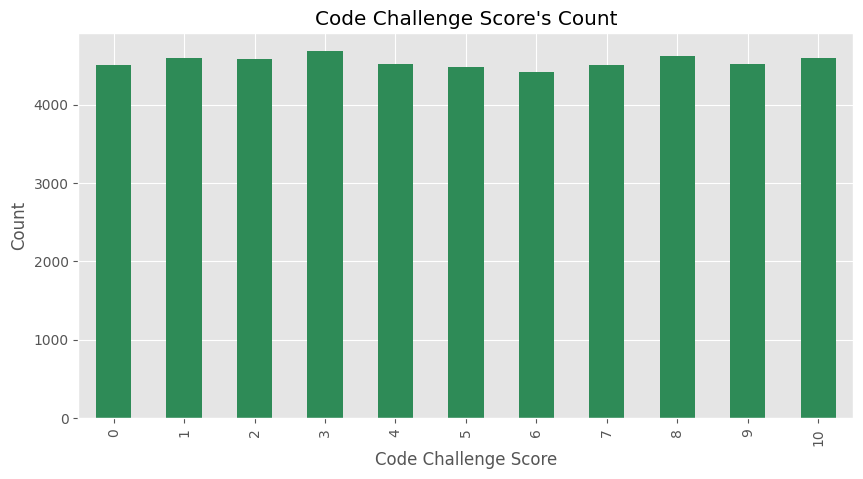

In [90]:
code_score = (df['code_challenge_score']
                       .value_counts()
                       .sort_index())

code_score.plot(kind='bar', figsize=(10, 5), title="Code Challenge Score's Count", color='seagreen')
plt.xlabel('Code Challenge Score')
plt.ylabel('Count')
plt.show()

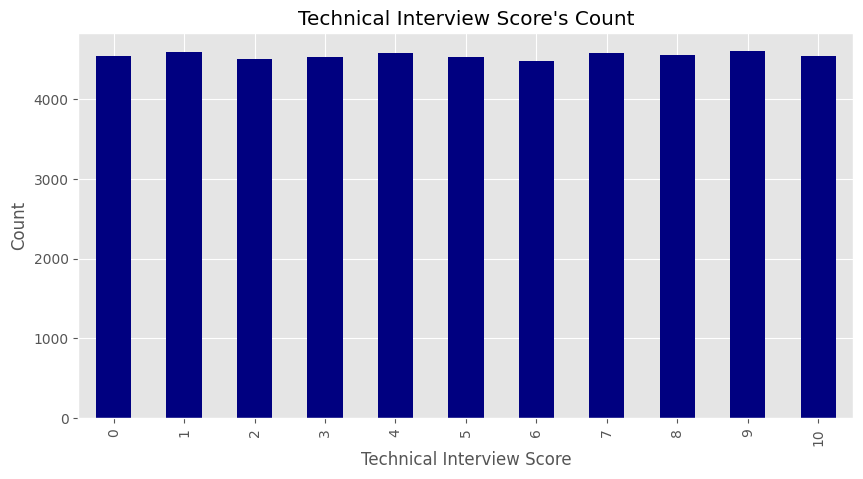

In [91]:
technical_interview_score = (df['technical_interview_score']
                            .value_counts()
                            .sort_index())

technical_interview_score.plot(kind='bar', figsize=(10, 5), title="Technical Interview Score's Count", color="navy")
plt.xlabel('Technical Interview Score')
plt.ylabel('Count')
plt.show()

### **Analyzing aspects of the date of application**

We will extract **the year and month** from the application date field. With these data, we will analyze the **frequency of enrollees per year** and the **availability of the data** in these time periods.

In [92]:
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month_name()

From 2018 to 2021 there is a **steady and persistent** trend of data, however, it is necessary to explore in depth the values of year 2022 given **its low frequency** compared to the other years.

In [93]:
year_counts = (df['year'].value_counts()
               .sort_index())
year_counts

year
2018    11061
2019    11009
2020    11237
2021    11051
2022     5642
Name: count, dtype: int64

The following Series returns the **frequency of candidates enrolled** *for each month* in 2022. While there is a stable trend of registrants from January through June, **in July there is a significant drop**. From August onwards the data on candidates **does not exist**, a reason that supports the fact that in 2022 the number of candidates **is so low**.

In [94]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

monthly_counts = (df.query("year == 2022")
                  .groupby("month")
                  .size()
                  .reindex(month_order))

monthly_counts

month
January      912.0
February     844.0
March        962.0
April        923.0
May          979.0
June         910.0
July         112.0
August         NaN
September      NaN
October        NaN
November       NaN
December       NaN
dtype: float64

## ***Filtering the dataframe: Code Challenge & Tech Interview Score***
---

The following code block filters the `df` dataframe to select only those records that meet the condition of having a score equal to or greater than 7 in both the `code_challenge_score` field and the `technical_interview_score` field. The result of this filtering is saved in a new dataframe called `df_hired`. This new dataframe contains only the records of the hired candidates that meet the score criteria.

In [95]:
df_hired = df.loc[(df['code_challenge_score'] >= 7) & (df['technical_interview_score'] >= 7)]
df_hired

,first_name,last_name,email,application_date,country,yoe,seniority,technology,code_challenge_score,technical_interview_score,year,month
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9,2020,April
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7,2020,May
8,Mose,Lakin,dale_murazik@hotmail.com,2018-03-13,Italy,18,Lead,Social Media Community Management,7,10,2018,March
13,Hilda,Rodriguez,jordan.hyatt@hotmail.com,2020-05-09,El Salvador,16,Junior,System Administration,7,8,2020,May
22,Crawford,Ullrich,bruce.koch7@yahoo.com,2021-01-09,Dominica,14,Junior,Game Development,8,8,2021,January
...,...,...,...,...,...,...,...,...,...,...,...,...
49935,Walton,Kohler,mitchell85@gmail.com,2018-12-15,Uruguay,17,Mid-Level,Database Administration,8,8,2018,December
49967,Reyna,Gorczany,barry_hilll39@yahoo.com,2018-01-14,Western Sahara,26,Lead,Development - CMS Backend,9,7,2018,January
49978,Danyka,West,susana.ratke@yahoo.com,2021-01-07,Ethiopia,25,Intern,Game Development,9,10,2021,January
49989,Bryana,Pagac,dante8@yahoo.com,2018-01-16,Nigeria,18,Intern,QA Manual,8,10,2018,January


### **Comparing the two dataframes**

Comparing the applicants who were hired with those who were not, we can conclude that only a very select group managed to join the company, emphasizing the strict quality controls of the company.

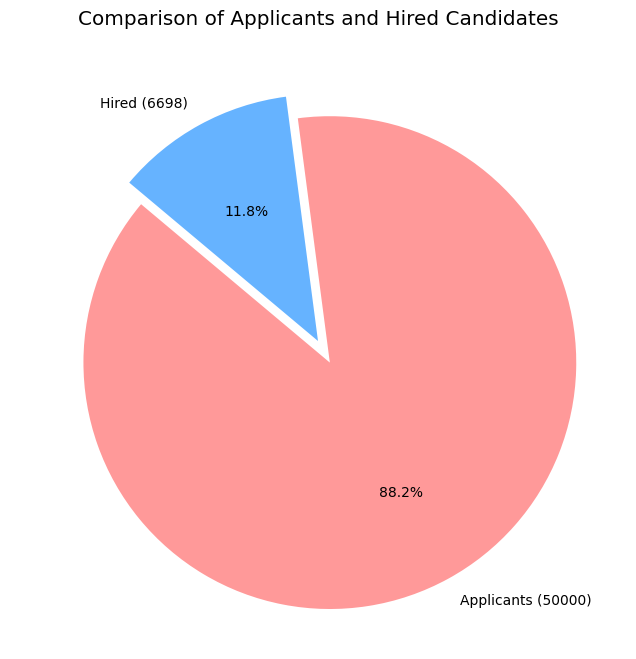

In [96]:
total_applicants = len(df)
total_hired = len(df_hired)

labels = [f'Applicants ({total_applicants})', f'Hired ({total_hired})']
sizes = [total_applicants, total_hired]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Comparison of Applicants and Hired Candidates')

plt.show()

### **Analyzing the technologies used by the hired candidates**

We observed that the two technologies with the highest number of candidates hired were **DevOps** and **Game Development**: their notoriety is considerable given the **difference in quantity** with respect to the rest of the technologies.

In [97]:
df_technology_count = (df_hired.groupby('technology')
                       .size()
                       .sort_values(ascending=False))

df_technology_count

technology
Game Development                           519
DevOps                                     495
System Administration                      293
Development - CMS Backend                  284
Database Administration                    282
Adobe Experience Manager                   282
Client Success                             271
Development - Frontend                     266
Security                                   266
Mulesoft                                   260
QA Manual                                  259
Salesforce                                 256
Development - Backend                      255
Data Engineer                              255
Business Analytics / Project Management    255
Business Intelligence                      254
Development - FullStack                    254
Development - CMS Frontend                 251
Security Compliance                        250
Design                                     249
QA Automation                              243
Sa

In [98]:
def color_palette(df):
    n_colors = len(df)
    return sns.color_palette("light:#5A9", n_colors=n_colors)

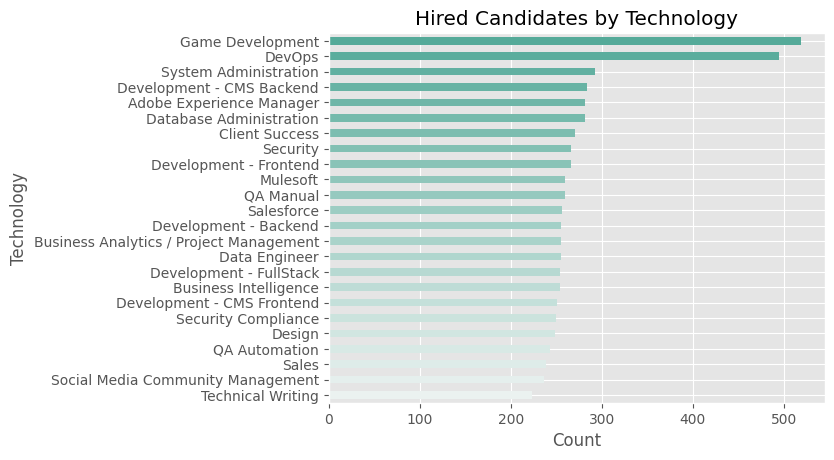

In [99]:
df_technology_count = df_technology_count.sort_values()

df_technology_count.plot(kind='barh', color=color_palette(df_technology_count))

plt.xlabel('Count')
plt.ylabel('Technology')
plt.title('Hired Candidates by Technology')

plt.show()

### **Analyzing the countries of the hired candidates**

Analyzing the 10 countries of origin with the highest number of candidates hired, we find a distribution that varies in very small amounts; this is due to the large number of countries to be analyzed, indicating a large dispersion in the existing data.

In [100]:
df_country_count = (df_hired.groupby('country')
                       .size()
                       .sort_values(ascending=False))

df_country_count

country
Northern Mariana Islands             44
Heard Island and McDonald Islands    41
Niger                                40
Sri Lanka                            40
Seychelles                           40
                                     ..
Canada                               18
Saint Vincent and the Grenadines     16
Maldives                             16
Guam                                 15
Montenegro                           15
Length: 244, dtype: int64

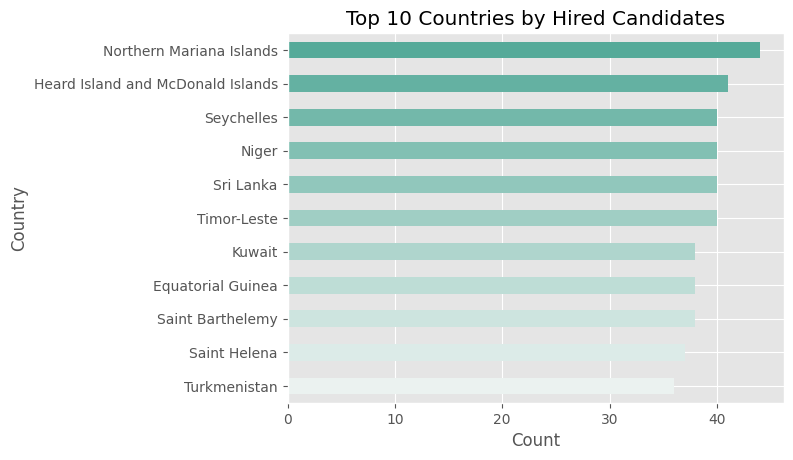

In [101]:
df_country_count = df_country_count[0:11].sort_values()

df_country_count.plot(kind='barh', color=color_palette(df_country_count))

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries by Hired Candidates')

plt.show()

### **Analyzing the seniority and YOE of the hired candidates**

Although Seniority doesn't have the wide dispersion that existed in the countries' case, it does follow the pattern of a distribution that varies in small amounts with respect to the previous values. In this case, it is worth noting that the positions with the highest number of hires were in the Intern and Trainee categories.

In [102]:
df_seniority_count = (df_hired.groupby('seniority')
                       .size()
                       .sort_values(ascending=False))

df_seniority_count

seniority
Intern       985
Junior       977
Trainee      973
Architect    971
Senior       939
Lead         929
Mid-Level    924
dtype: int64

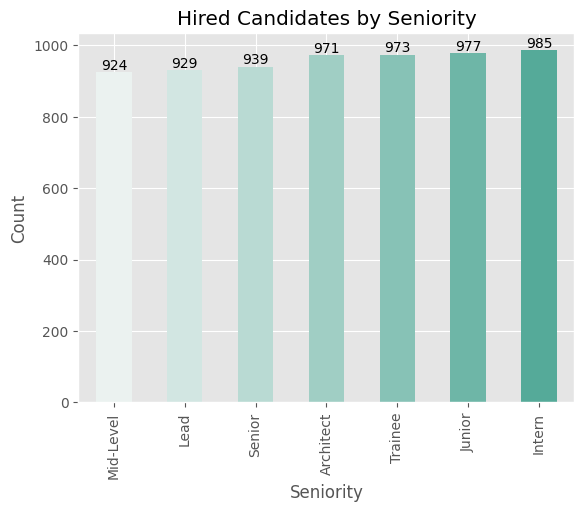

In [103]:
df_seniority_count = df_seniority_count.sort_values()

df_seniority_count.plot(kind='bar', color=color_palette(df_seniority_count))

for i, v in enumerate(df_seniority_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Seniority')
plt.ylabel('Count')
plt.title('Hired Candidates by Seniority')

plt.show()

It's clear that for a candidate to have a Leader Seniority he/she must have had extensive years of experience (YOE). This relationship of YOE and Seniority can also be observed in Intern and Trainee, which must have few years of experience: let's see if this is the case by obtaining the average YOE for each Seniority.

In [104]:
seniority_avg_yoe = (df.groupby('seniority')['yoe']
                     .mean()
                     .sort_values(ascending=False))
seniority_avg_yoe

seniority
Intern       15.406892
Lead         15.365578
Architect    15.345105
Junior       15.324930
Mid-Level    15.213291
Trainee      15.178616
Senior       15.174529
Name: yoe, dtype: float64

As can be seen in the results above and in the graph below, there are inconsistencies between Seniority and years of experience (YOE). For example, we find the case of Intern where the average YOE for its candidates is 15.41 years, slightly higher than Lead, a position that requires a high YOE value and has an average of 15.37 years. The same case can be observed with Trainee, which has an exaggeratedly high YOE for what the role really represents.

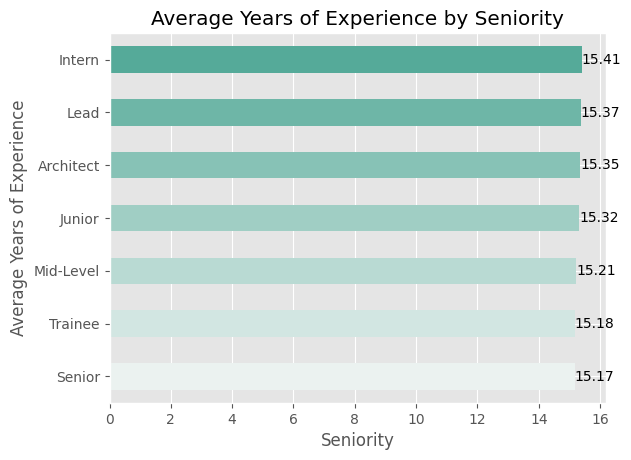

In [105]:
seniority_avg_yoe = seniority_avg_yoe.sort_values(ascending=True)
seniority_avg_yoe.plot(kind='barh', color=color_palette(seniority_avg_yoe))

plt.xlabel('Seniority')
plt.ylabel('Average Years of Experience')
plt.title('Average Years of Experience by Seniority')

for i, v in enumerate(seniority_avg_yoe.values):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center')

plt.show()

## **Conclusions and Findings**

* Given the randomness of the data generated, many relationships between variables are incongruent. However, these are relationships that, given a dataset with real data, must be posed in order to make findings relevant to the context to be analyzed.

* The technologies in which candidates specialize can be synthesized into a smaller number of categories in order to facilitate future analysis through dashboard graphs.

* There are a significant number of candidates who apply more than once.

* There is an irregular and inconsistent correlation between years of experience (YOE) and the candidate's role (Seniority).
